In [1]:
# Importing Dataset
dir =  '../Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/R/Social_Network_Ads.csv'
dataset = read.csv(dir)

In [2]:
dataset = dataset[3:5]

In [3]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))
#dataset$Gender = factor(dataset$Gender,
#                        levels = c('Male', 'Female'),
#                        labels = c( 1, 2))

In [4]:
library('caTools')
set.seed(123)

In [5]:
split = sample.split(dataset$Purchased, SplitRatio=0.75 )
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split==FALSE)

In [6]:
#Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [7]:
nrow(dataset)
nrow(training_set)
nrow(test_set)

[1] 400

[1] 300

[1] 100

In [9]:
install.packages('randomForest')
library('randomForest')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [10]:
test_set

,Age,EstimatedSalary,Purchased
2,-0.30419063,-1.5135434,0
4,-1.05994374,-0.3245603,0
5,-1.81569686,0.2859986,0
9,-1.24888202,-1.0957926,0
12,-1.15441288,-0.4852337,0
18,0.64050076,-1.3207353,1
19,0.73496990,-1.2564660,1
20,0.92390818,-1.2243313,1
22,0.82943904,-0.5816377,1
29,-0.87100546,-0.7744458,0


In [20]:
classifier  = randomForest(x = training_set[,-3],
                           y = training_set[,3],
                           ntree = 500)

In [21]:
y_pred = predict(classifier, newdata=test_set[,-3], type = 'class')

In [22]:
table(test_set$Purchased)


 0  1 
64 36 

In [23]:
table(y_pred)

y_pred
 0  1 
63 37 

In [24]:
mean(y_pred == test_set$Purchased)

[1] 0.85

In [25]:
cm = table(test_set[, 3], y_pred)

In [26]:
cm

   y_pred
     0  1
  0 56  8
  1  7 29

In [27]:
library(ElemStatLearn)

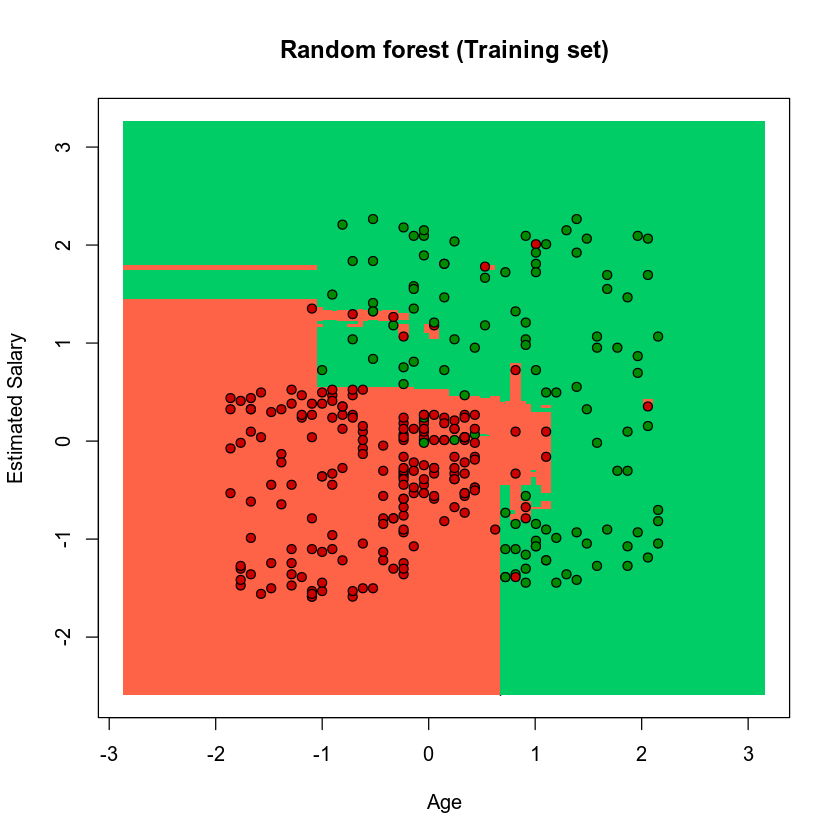

In [30]:
set = training_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = predict(classifier, newdata=grid_set)
plot(set[,-3],
     main = 'Random forest (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

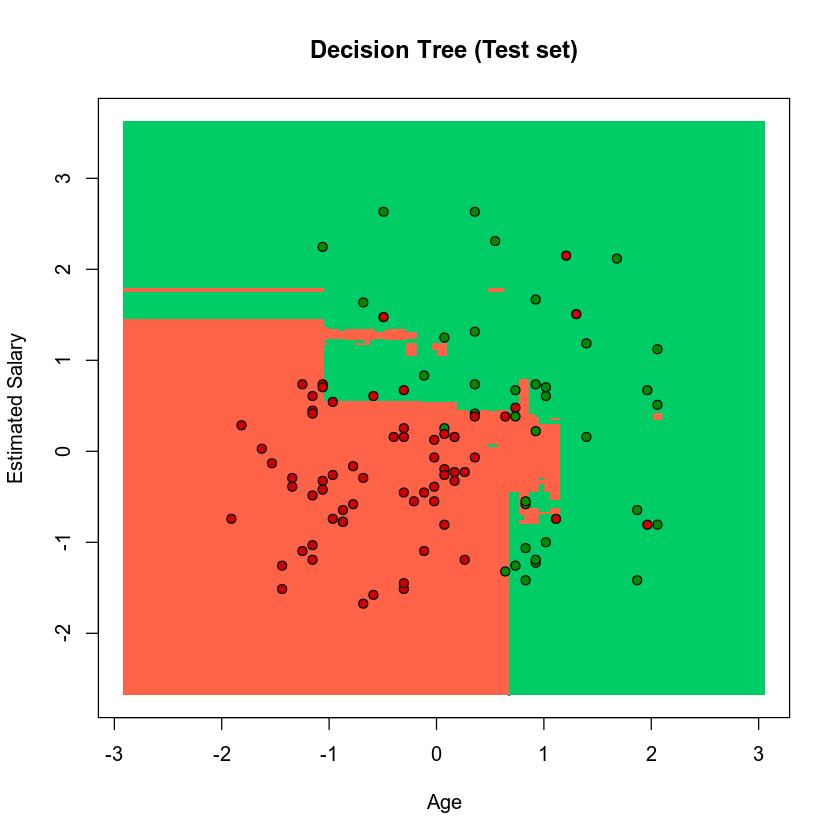

In [31]:
set = test_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = predict(classifier, newdata=grid_set)
plot(set[,-3],
     main = 'Decision Tree (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

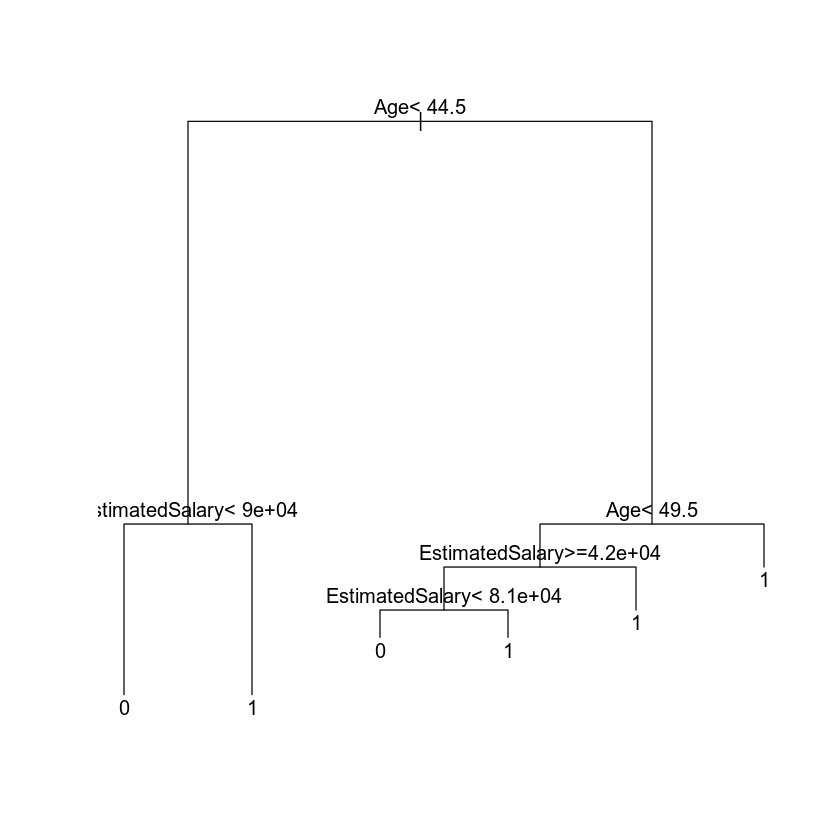

In [146]:
plot(classifier)
text(classifier)